In [2]:
!export CUDA_VISIBLE_DEVICES="0"
import os
os.sys.path

['/home/khaldoun/tfgpu/InnoSpark-edir/ML first attempt',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python38.zip',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/lib-dynload',
 '',
 '/home/khaldoun/.local/lib/python3.8/site-packages',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages',
 '/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages/IPython/extensions',
 '/home/khaldoun/.ipython']

In [3]:
import tensorflow as tf
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

gpus = get_available_gpus()
print("Tensorflow version is:")
print(tf.__version__)
print("Available GPUs are:")
print(gpus)


Tensorflow version is:
2.3.0
Available GPUs are:
[]


In [4]:
# gpus= tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
import numpy as np
import cv2
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



In [5]:
#import Excelsheet
path = r"./input/5k_diagnosis"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
#df = df.head(200)
df.head()
df.shape

(6392, 19)

In [6]:
# l =df[df['C'] == 0 ]['filename']
# l = l[:2000]

In [7]:
# results = []
# for i, name in enumerate(l):
#     name = name
#     img = cv2.imread(os.path.join(path,"preprocessed_images",name))
#     img = cv2.resize(img, (64, 64))
#     img = img.reshape(1 ,64 , 64 , -1)
#     model7.predict([img])
#     results.append(model7.predict([img]))

In [8]:
# import pandas as pd 

# sum(results)/len(results)

In [9]:
# l =df[df['C'] == 1 ]['filename']
# l = l[:2000]
# results = []
# for i, name in enumerate(l):
#     name = name
#     img = cv2.imread(os.path.join(path,"preprocessed_images",name))
#     img = cv2.resize(img, (64, 64))
#     img = img.reshape(1 ,64 , 64 , -1)
#     model7.predict([img])
#     results.append(model7.predict([img]))
    
# sum(results)/len(results)

In [10]:
# results

In [11]:
file_names = []
labels = []
df = df.drop_duplicates()

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["D"], df["Left-Fundus"]):
    
    if(("retinopathy" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)
        
for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["D"], df["Right-Fundus"]):
    
    if(("retinopathy" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))


8622 8622


In [12]:
#define Image size 
ROW = 64
COL = 64

In [13]:
#load images into numpy array and resize them 
image_data = []
for idx, image_name in enumerate(file_names):
    
    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]

image_data = np.array(image_data)



In [14]:
print(len(labels) , len(image_data))

8501 8501


In [15]:
pd.DataFrame(labels).value_counts()

0    5084
1    3417
dtype: int64

In [16]:

#prepare training data by sampling 
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)
y_data = np.array(y_data)


print(X_data.shape, y_data.shape)

pd.DataFrame(y_data).value_counts()

(6834, 64, 64, 3) (6834,)


1    3417
0    3417
dtype: int64

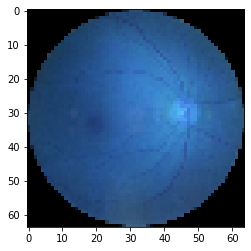

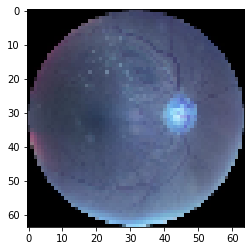

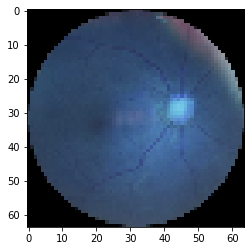

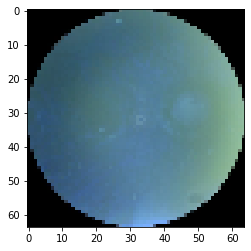

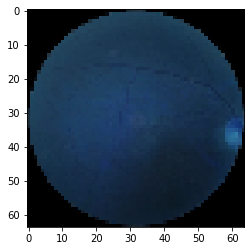

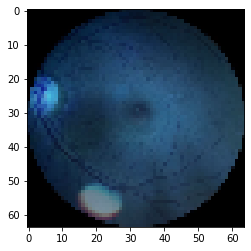

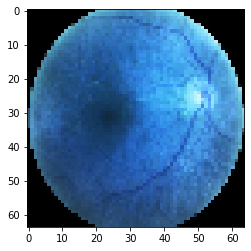

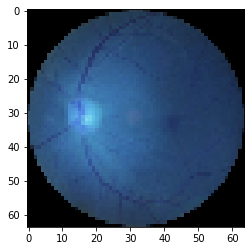

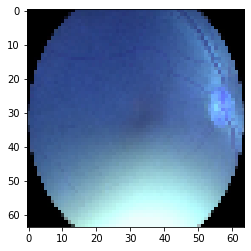

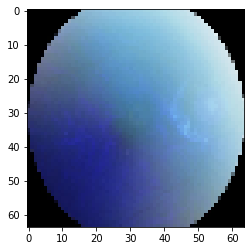

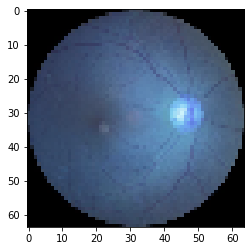

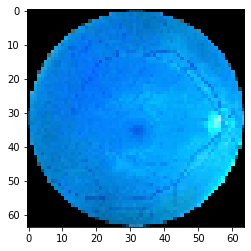

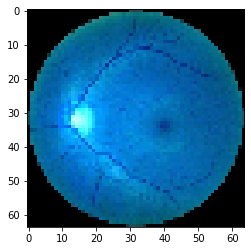

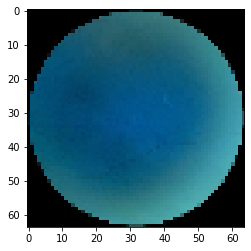

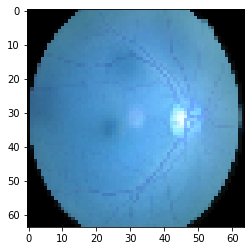

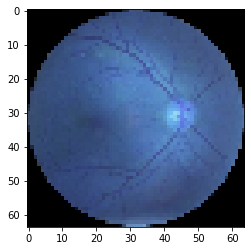

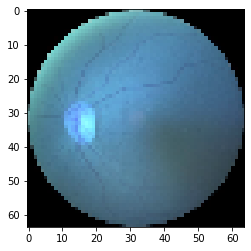

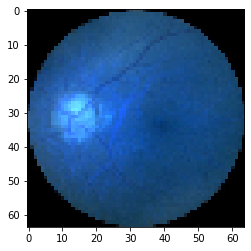

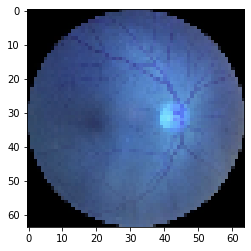

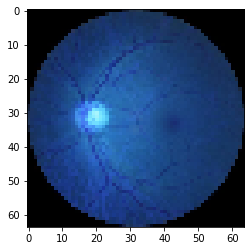

In [17]:
#display some images 
for i in range(20):
    n = random. randint(0,len(y_data))
    plt.imshow(X_data[n])
    plt.show()
    


In [18]:
#X_data = X_data.reshape((len(y_data), -1))

Trying Ensemble Method 

In [19]:
pd.DataFrame(y_data).value_counts()

1    3417
0    3417
dtype: int64

#  Train CNN


In [6]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#fix this man 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [21]:

X_data_CNN = (X_data)


In [22]:
#split data into train and test 

##### test is 40%
X_train, X_test, y_train, y_test = train_test_split(X_data_CNN, y_data, test_size=0.4, shuffle = True, random_state = 1)


#split train into train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.4, shuffle = True, random_state = 2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


pd.DataFrame(y_train).value_counts()

(2460, 64, 64, 3) (2460,)
(1640, 64, 64, 3) (1640,)
(2734, 64, 64, 3) (2734,)


1    1230
0    1230
dtype: int64

In [9]:
save_dir = './saved_models'
model_name = 'k.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)




k_dc = 0.2	# Dropout constant for convolutional layers
k_dd = 0.5	# Dropout constant for dense layers


In [10]:
def create_model(activation_conv = 'relu', activation_dense = 'relu', activation_output = None , loss = 'mse' , lr = 0.001 ):
    model = models.Sequential()
    
#     model.add(layers.Flatten(input_shape=(ROW,COL,3)))
    
    model.add(layers.Conv2D(32, (3, 3), input_shape=(ROW,COL,3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    
    model.add(layers.Conv2D(32, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    
    model.add(layers.Conv2D(32, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    model.add(layers.MaxPooling2D((2, 2)))
    
    
    
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    
    model.add(layers.Conv2D(64, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc)) 
    model.add(layers.MaxPooling2D((2, 2)))
    

    model.add(layers.Conv2D(128, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    model.add(layers.Conv2D(128, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc))
    
    model.add(layers.Conv2D(128, (3, 3) , padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(activation_conv))
    model.add(Dropout(k_dc)) 
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(Dense(128, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation(activation_dense))
    model.add(Dropout(k_dd))

    model.add(Dense(1, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation(activation_output))


    opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=opt, 
        loss = 'mse',
        metrics=['accuracy'])
    return model


In [11]:
def run(model , name = "k", epochs = 30):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.1,  # set range for random shear
        zoom_range=0.2,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        #validation_split=0.15
    )

    # We stop when the best validation loss is 20 epochs in the past
    stopping = EarlyStopping(monitor='val_loss', patience=20)

    # We save the best model based on validation loss
    checkpoints = ModelCheckpoint(model_path, save_best_only=True)

    # We reduce the learning rate by half when the best validation 15 epochs in the past
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_delta=1E-7)
    
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)
    train_generator = datagen.flow(X_train, y_train, batch_size=32)
    valid_generator = datagen.flow(X_val, y_val, batch_size=32)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(train_generator,
                        validation_data=valid_generator,
                        epochs=epochs
                                 ,callbacks=[stopping, checkpoints, rlrp],)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
    print("#############################################################")
    print(f"The test accuracy is: {test_acc}")
    print(f"The test lose is : {test_loss}")
    print("#############################################################")
    print(f"The train accuracy : {train_acc}")
    print(f"The train lose is : {train_loss}")
    print("#############################################################")
    print(f"The val accuracy is : {val_acc}")
    print(f"The val lose is : {val_loss}")
    ####################################################
    model = load_model(model_path)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
    print("#############################################################")
    print(f"The test accuracy is: {test_acc}")
    print(f"The test lose is : {test_loss}")
    print("#############################################################")
    print(f"The train accuracy : {train_acc}")
    print(f"The train lose is : {train_loss}")
    print("#############################################################")
    print(f"The val accuracy is : {val_acc}")
    print(f"The val lose is : {val_loss}")
    ####################################################
    os.rename(model_path, os.path.join(save_dir, f"{name}-{int(test_acc*100)}.h5"))
    
    return history


In [26]:
model = create_model(activation_dense='sigmoid')
run(model , name = 'sigmoind_DR_small_data', epochs = 200)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
77/77 [==============================] - 50s 654ms/step - loss: 1.2308 - accuracy: 0.5427 - val_loss: 9.5420 - val_accuracy: 0.5018
Epoch 2/200
77/77 [==============================] - 50s 645ms/step - loss: 1.0429 - accuracy: 0.5484 - val_loss: 0.9582 - val_accuracy: 0.5665
Epoch 3/200
77/77 [==============================] - 50s 652ms/step - loss: 0.8417 - accuracy: 0.5720 - val_loss: 1.3139 - val_accuracy: 0.5311
Epoch 4/200
77/77 [==============================] - 46s 603ms/step - loss: 0.6955 - accuracy: 0.5679 - val_loss: 1.6224 - val_accuracy: 0.5561
Epoch 5/200
77/77 [==============================] - 49s 636ms/step - loss: 0.5808 - accuracy: 0.5707 - val_loss: 0.4533 - val_accuracy: 0.5171
Epoch 6/200
77/77 [==============================] - 46s 597ms/step - loss: 0.4870 - accuracy: 0.5703 - val_loss: 0.8503 - val_accuracy: 0.5012
Epoch 7/200
77/77 [==============================] - 47s 607

KeyboardInterrupt: 

In [ ]:
model = create_model(activation_dense='sigmoid' )
run(model , name = 'sigmoid_DR_small_data', epochs = 200)

In [ ]:
ls

In [ ]:
filepath = './saved_models/sigmoid_final_cataract-90.h5'
model7 = load_model(filepath)

In [ ]:
ls saved_models/

In [ ]:
    test_loss, test_acc = model7.evaluate(X_test, y_test, verbose=2)
    train_loss, train_acc = model7.evaluate(X_train, y_train, verbose=2)
    val_loss, val_acc = model7.evaluate(X_val, y_val, verbose=2)
    print("#############################################################")
    print(f"The test accuracy is: {test_acc}")
    print(f"The test lose is : {test_loss}")
    print("#############################################################")
    print(f"The train accuracy : {train_acc}")
    print(f"The train lose is : {train_loss}")
    print("#############################################################")
    print(f"The val accuracy is : {val_acc}")
    print(f"The val lose is : {val_loss}")
    ####################################################

In [ ]:
X_test.shape

In [ ]:
X_val.shape

In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
plot_model(model, to_file='model.png', rankdir='LR')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [20]:
from tensorflow.keras.utils import plot_model
model = load_model('./saved_models/sigmoid_final_cataract-89.h5')

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0

In [14]:
ls saved_models/


k.h5           sigmoid-79.h5                 sigmoid_final_cataract-59.h5
relu-56.h5     sigmoid-80.h5                 sigmoid_final_cataract-60.h5
relu-66.h5     sigmoid-88.h5                 sigmoid_final_cataract-61.h5
relu-69.h5     sigmoid-89.h5                 sigmoid_final_cataract-63.h5
relu-72.h5     sigmoid-93.h5                 sigmoid_final_cataract-64.h5
relu-73.h5     sigmoid_final-89.h5           sigmoid_final_cataract-69.h5
relu-81.h5     sigmoid_final_cataract-44.h5  sigmoid_final_cataract-70.h5
relu-83.h5     sigmoid_final_cataract-49.h5  sigmoid_final_cataract-89.h5
relu-86.h5     sigmoid_final_cataract-50.h5  sigmoid_final_cataract-90.h5
relu-88.h5     sigmoid_final_cataract-52.h5  sigmoid_final_cataract-92.h5
relu-89.h5     sigmoid_final_cataract-54.h5  sigmoid_final_DR-59.h5
relu-90.h5     sigmoid_final_cataract-55.h5  sigmoid_final_DR-63.h5
relu-93.h5     sigmoid_final_cataract-56.h5  sigmoid_final_DR-65.h5
sigmoid-45.h5  sigmoid_final_cataract-57.h5  sigmoind_DR